# Heavy Traffic Indicators on I-94

This project focuses on analyzing traffic patterns on the westbound lanes of the I-94 Interstate highway. The aim is to identify key factors associated with heavy traffic, such as weather conditions, time of day, and day of the week, to better understand what influences congestion. FIle: Metro_Interstate_Traffic_Volume.csv

## Dataset Overview

The analysis is based on the I-94 Traffic Dataset, provided by John Hogue. The dataset is publicly available for download from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php).



| Variable Name | Role | Type | Description | Units | Missing Values |
|--------------|------|------|-------------|--------|----------------|
| holiday | Feature | Categorical | US National holidays plus regional holiday, Minnesota State Fair | | no |
| temp | Feature | Continuous | Average temp in kelvin | Kelvin | no |
| rain_1h | Feature | Continuous | Amount in mm of rain that occurred in the hour | mm | no |
| snow_1h | Feature | Continuous | Amount in mm of snow that occurred in the hour | mm | no |
| clouds_all | Feature | Integer | Percentage of cloud cover | % | no |
| weather_main | Feature | Categorical | Short textual description of the current weather | | no |
| weather_description | Feature | Categorical | Longer textual description of the current weather | | no |
| date_time | Feature | Date | Hour of the data collected in local CST time | | no |
| traffic_volume | Target | Integer | Hourly I-94 ATR 301 reported westbound traffic volume | | no |

In [2]:
#import pandas and numpy
import pandas as pd
import numpy as np
# Import matplotlib for plotting
import matplotlib.pyplot as plt
import seaborn as sns

#read the dataset Metro_Interstate_Traffic_Volume.csv
df = pd.read_csv('../data/Metro_Interstate_Traffic_Volume.csv')
#display the first 5 rows of the dataframe
print(df.head())
print('--------')
#display the last 5 rows of the dataframe
print(df.tail())
print('--------')

  holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0     NaN  288.28      0.0      0.0          40       Clouds   
1     NaN  289.36      0.0      0.0          75       Clouds   
2     NaN  289.58      0.0      0.0          90       Clouds   
3     NaN  290.13      0.0      0.0          90       Clouds   
4     NaN  291.14      0.0      0.0          75       Clouds   

  weather_description            date_time  traffic_volume  
0    scattered clouds  2012-10-02 09:00:00            5545  
1       broken clouds  2012-10-02 10:00:00            4516  
2     overcast clouds  2012-10-02 11:00:00            4767  
3     overcast clouds  2012-10-02 12:00:00            5026  
4       broken clouds  2012-10-02 13:00:00            4918  
--------
      holiday    temp  rain_1h  snow_1h  clouds_all  weather_main  \
48199     NaN  283.45      0.0      0.0          75        Clouds   
48200     NaN  282.76      0.0      0.0          90        Clouds   
48201     NaN  282.73      0.0   

In [3]:
#show info and describe the dataframe
print(df.info())
print('------------')
print(df.shape)
print('------------')
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB
None
------------
(48204, 9)
------------


,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000
mean,281.205870,0.334264,0.000222,49.362231,3259.818355
std,13.338232,44.789133,0.008168,39.015750,1986.860670
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,272.160000,0.000000,0.000000,1.000000,1193.000000
50%,282.450000,0.000000,0.000000,64.000000,3380.000000
75%,291.806000,0.000000,0.000000,90.000000,4933.000000
max,310.070000,9831.300000,0.510000,100.000000,7280.000000


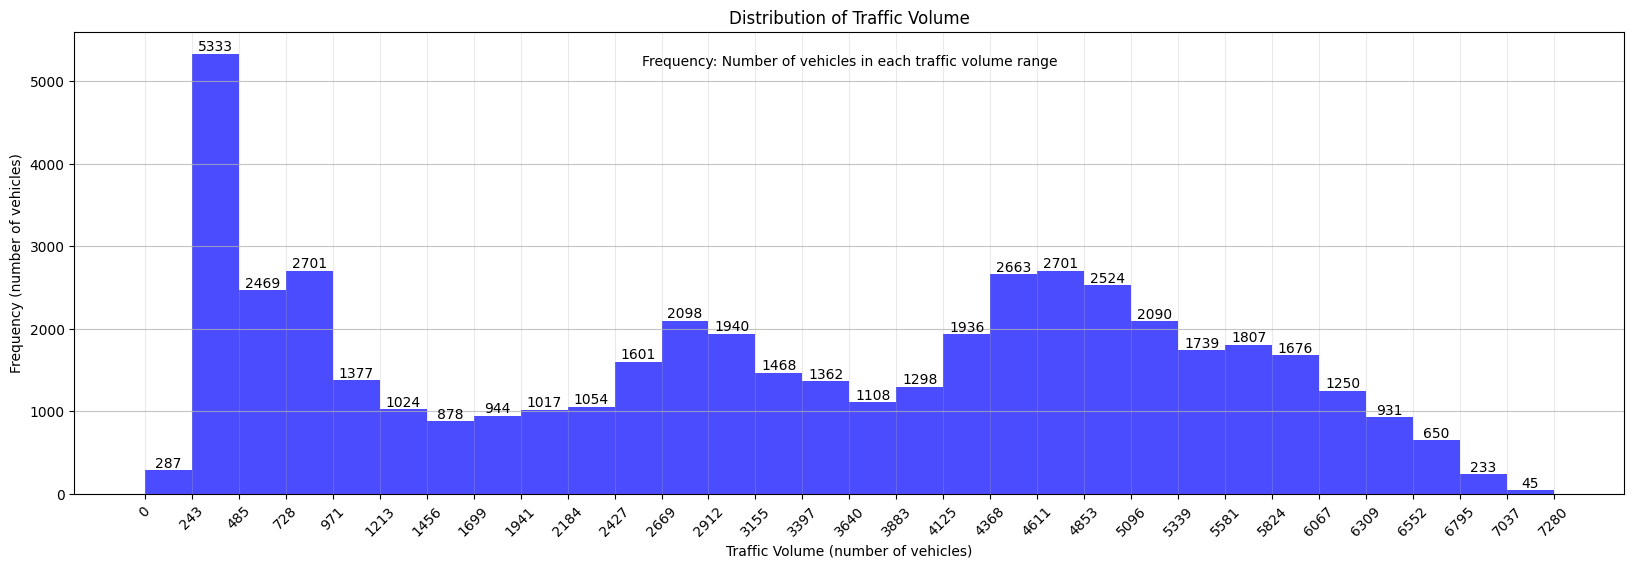

In [4]:
# Plot a histogram to examine the distribution of the traffic_volume column
plt.figure(figsize=(20, 6))  # Set the figure size
counts, bins, patches = plt.hist(df['traffic_volume'], bins=30, color='blue', alpha=0.7)  # Create the histogram

# Set the x-axis ticks to correspond to the bin edges
plt.xticks(bins, rotation=45)  # Rotate x-axis labels for better readability

plt.title('Distribution of Traffic Volume')  # Title of the histogram
plt.xlabel('Traffic Volume (number of vehicles)')  # X-axis label
plt.ylabel('Frequency (number of vehicles)')  # Y-axis label with clarification

# Add grid lines for better readability
plt.grid(axis='y', alpha=0.75)  # Add grid for y-axis
plt.grid(axis='x', alpha=0.25)  # Optional: Add grid for x-axis as well

# Add a text annotation to explain frequency
plt.text(0.5, 0.95, 'Frequency: Number of vehicles in each traffic volume range', 
         ha='center', va='top', transform=plt.gca().transAxes, fontsize=10)

# Add values on top of each bar
for count, x in zip(counts, bins):
    plt.annotate(f'{int(count)}', 
                 xy=(x + (bins[1] - bins[0]) / 2, count),  # Position above the bar
                 ha='center', va='bottom')

plt.show()  # Display the plot

In [5]:
#look up a few stat# Look up statistics about the traffic_volume column
traffic_volume_stats = df['traffic_volume'].describe()
# Display the statistics
print(traffic_volume_stats)




count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64


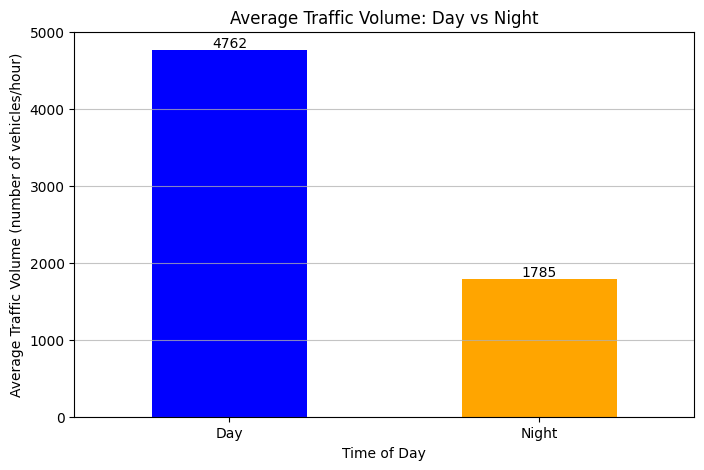

In [6]:
# Convert the 'date_time' column to datetime format if it's not already
df['date_time'] = pd.to_datetime(df['date_time'])

# Create a new column for Day/Night
df['time_of_day'] = np.where((df['date_time'].dt.hour >= 7) & (df['date_time'].dt.hour < 19), 'Day', 'Night')

# Calculate average traffic volume for Day and Night
average_traffic = df.groupby('time_of_day')['traffic_volume'].mean()
average_day_traffic = average_traffic['Day']  # Average traffic volume during the day
average_night_traffic = average_traffic['Night']  # Average traffic volume during the night

# Visualize the traffic volume for Day and Night
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
bars = average_traffic.plot(kind='bar', color=['blue', 'orange'])
plt.title('Average Traffic Volume: Day vs Night')
plt.xlabel('Time of Day')
plt.ylabel('Average Traffic Volume (number of vehicles/hour)')
plt.xticks(rotation=0)

# Add annotations to the bars
for bar in bars.patches:
    plt.annotate(f'{int(bar.get_height())}', 
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                 ha='center', va='bottom')

plt.grid(axis='y', alpha=0.75)
plt.show()

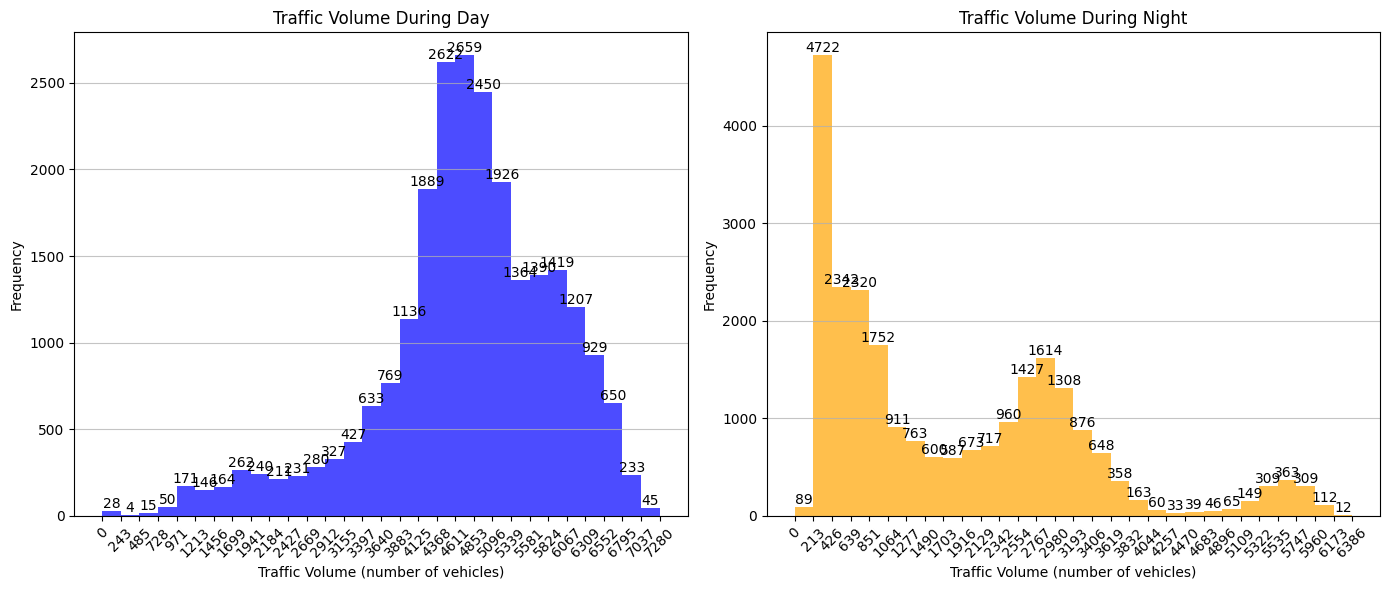

In [7]:
# Assuming df is your DataFrame and 'time_of_day' column is already created
# Filter the data for Day and Night
day_data = df[df['time_of_day'] == 'Day']
night_data = df[df['time_of_day'] == 'Night']

# Set up the figure for two subplots
plt.figure(figsize=(14, 6))

# Histogram for Day Traffic Volume
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
counts_day, bins_day, patches_day = plt.hist(day_data['traffic_volume'], bins=30, color='blue', alpha=0.7)
plt.title('Traffic Volume During Day')
plt.xlabel('Traffic Volume (number of vehicles)')
plt.ylabel('Frequency')
plt.xticks(bins_day, rotation=45)
plt.grid(axis='y', alpha=0.75)

# Add values on top of each bar for Day
for count, x in zip(counts_day, bins_day):
    plt.annotate(f'{int(count)}', 
                 xy=(x + (bins_day[1] - bins_day[0]) / 2, count), 
                 ha='center', va='bottom')

# Histogram for Night Traffic Volume
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
counts_night, bins_night, patches_night = plt.hist(night_data['traffic_volume'], bins=30, color='orange', alpha=0.7)
plt.title('Traffic Volume During Night')
plt.xlabel('Traffic Volume (number of vehicles)')
plt.ylabel('Frequency')
plt.xticks(bins_night, rotation=45)
plt.grid(axis='y', alpha=0.75)

# Add values on top of each bar for Night
for count, x in zip(counts_night, bins_night):
    plt.annotate(f'{int(count)}', 
                 xy=(x + (bins_night[1] - bins_night[0]) / 2, count), 
                 ha='center', va='bottom')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Display the plots

In [8]:
# Display descriptive statistics for daytime traffic volume
day_stats = day_data['traffic_volume'].describe()
print("Daytime Traffic Volume Statistics:")
print(day_stats)

# Display descriptive statistics for nighttime traffic volume
night_stats = night_data['traffic_volume'].describe()
print("\nNighttime Traffic Volume Statistics:")
print(night_stats)


Daytime Traffic Volume Statistics:
count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

Nighttime Traffic Volume Statistics:
count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64


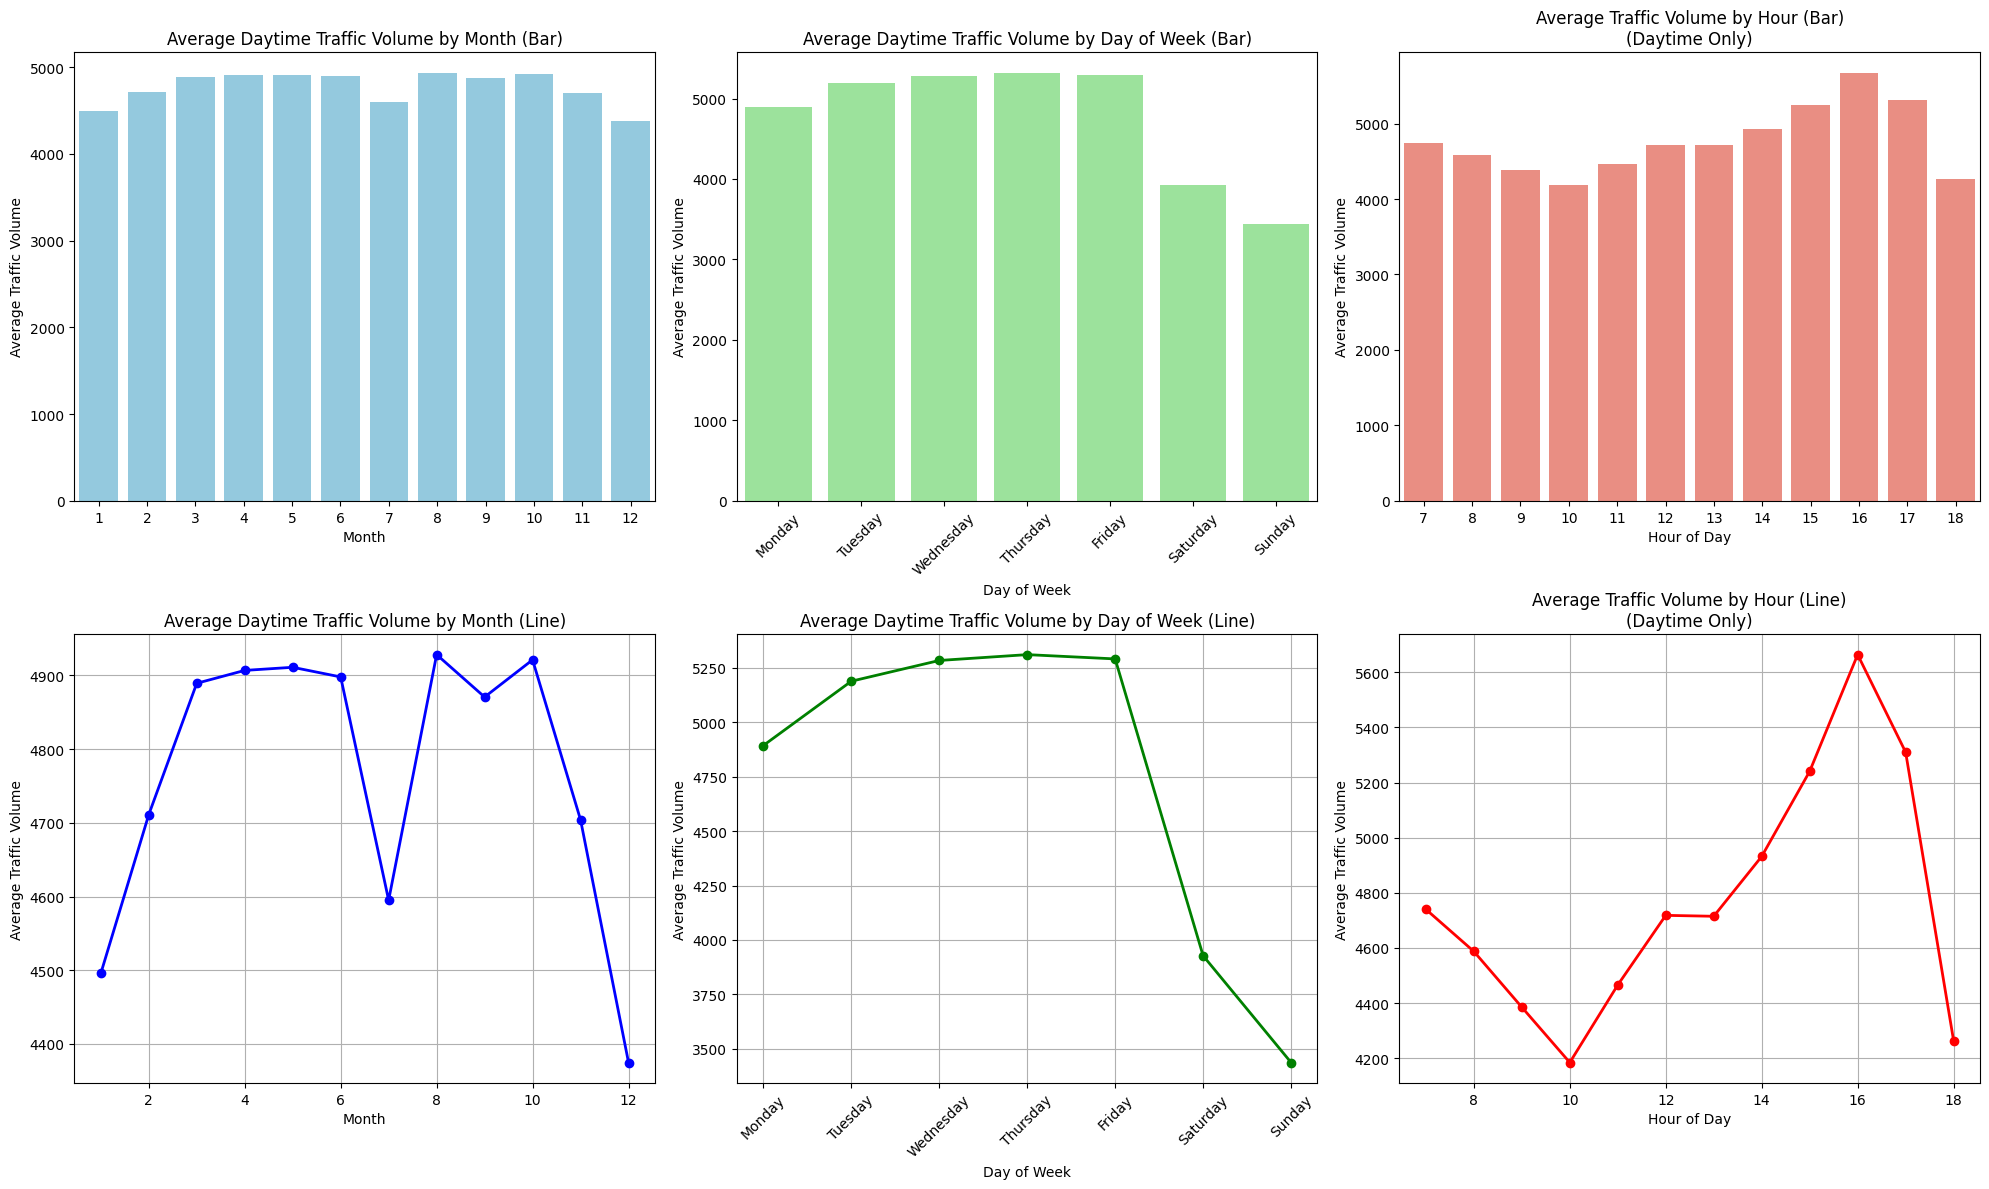


Daytime Traffic Volume Statistics:

By Month:
month
1     4495.61
2     4711.20
3     4889.41
4     4906.89
5     4911.12
6     4898.02
7     4595.04
8     4928.30
9     4870.78
10    4921.23
11    4704.09
12    4374.83
Name: traffic_volume, dtype: float64

By Day of Week:
day_of_week
Monday       4893.55
Tuesday      5189.00
Wednesday    5284.45
Thursday     5311.30
Friday       5291.60
Saturday     3927.25
Sunday       3436.54
Name: traffic_volume, dtype: float64

By Hour (7 AM - 7 PM):
hour
7     4740.18
8     4587.50
9     4385.28
10    4184.67
11    4465.88
12    4718.29
13    4714.94
14    4931.89
15    5240.52
16    5663.76
17    5310.08
18    4263.72
Name: traffic_volume, dtype: float64


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Convert date_time to datetime if not already
df['date_time'] = pd.to_datetime(df['date_time'])

# Extract time components
df['month'] = df['date_time'].dt.month
df['day_of_week'] = df['date_time'].dt.day_name()
df['hour'] = df['date_time'].dt.hour

# Filter for daytime only (7 AM to 7 PM)
day_data = df[(df['hour'] >= 7) & (df['hour'] < 19)].copy()

# Create figure with 6 subplots (3 bar plots and 3 line plots)
plt.figure(figsize=(20, 12))

# 1. Monthly Traffic Pattern - Bar Plot
plt.subplot(2, 3, 1)
monthly_traffic = day_data.groupby('month')['traffic_volume'].mean()
monthly_df = pd.DataFrame({'Month': monthly_traffic.index, 'Traffic': monthly_traffic.values})
sns.barplot(data=monthly_df, x='Month', y='Traffic', color='skyblue')
plt.title('Average Daytime Traffic Volume by Month (Bar)')
plt.xlabel('Month')
plt.ylabel('Average Traffic Volume')

# 2. Daily Traffic Pattern - Bar Plot
plt.subplot(2, 3, 2)
daily_traffic = day_data.groupby('day_of_week')['traffic_volume'].mean()
# Reorder days
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_traffic = daily_traffic.reindex(day_order)
daily_df = pd.DataFrame({'Day': daily_traffic.index, 'Traffic': daily_traffic.values})
sns.barplot(data=daily_df, x='Day', y='Traffic', color='lightgreen')
plt.title('Average Daytime Traffic Volume by Day of Week (Bar)')
plt.xlabel('Day of Week')
plt.xticks(rotation=45)
plt.ylabel('Average Traffic Volume')

# 3. Hourly Traffic Pattern - Bar Plot (only daytime hours)
plt.subplot(2, 3, 3)
hourly_traffic = day_data.groupby('hour')['traffic_volume'].mean()
hourly_df = pd.DataFrame({'Hour': hourly_traffic.index, 'Traffic': hourly_traffic.values})
sns.barplot(data=hourly_df, x='Hour', y='Traffic', color='salmon')
plt.title('Average Traffic Volume by Hour (Bar)\n(Daytime Only)')
plt.xlabel('Hour of Day')
plt.ylabel('Average Traffic Volume')

# 4. Monthly Traffic Pattern - Line Plot
plt.subplot(2, 3, 4)
plt.plot(monthly_traffic.index, monthly_traffic.values, marker='o', color='blue', linewidth=2)
plt.title('Average Daytime Traffic Volume by Month (Line)')
plt.xlabel('Month')
plt.ylabel('Average Traffic Volume')
plt.grid(True)

# 5. Daily Traffic Pattern - Line Plot
plt.subplot(2, 3, 5)
plt.plot(range(len(daily_traffic)), daily_traffic.values, marker='o', color='green', linewidth=2)
plt.title('Average Daytime Traffic Volume by Day of Week (Line)')
plt.xlabel('Day of Week')
plt.xticks(range(len(daily_traffic)), daily_traffic.index, rotation=45)
plt.ylabel('Average Traffic Volume')
plt.grid(True)

# 6. Hourly Traffic Pattern - Line Plot
plt.subplot(2, 3, 6)
plt.plot(hourly_traffic.index, hourly_traffic.values, marker='o', color='red', linewidth=2)
plt.title('Average Traffic Volume by Hour (Line)\n(Daytime Only)')
plt.xlabel('Hour of Day')
plt.ylabel('Average Traffic Volume')
plt.grid(True)

plt.tight_layout()
plt.show()

# Print statistics
print("\nDaytime Traffic Volume Statistics:")
print("\nBy Month:")
print(monthly_traffic.round(2))
print("\nBy Day of Week:")
print(daily_traffic.round(2))
print("\nBy Hour (7 AM - 7 PM):")
print(hourly_traffic.round(2))

The traffic analysis reveals distinct temporal patterns across different time scales. Monthly patterns show higher traffic volumes during summer months (June-August), likely due to vacation travel and better weather conditions. Daily patterns indicate peak congestion during weekdays, particularly Tuesday through Thursday, with significantly lower volumes on weekends. The hourly pattern demonstrates classic rush hour peaks: a sharp morning peak between 7-9 AM as commuters head to work, and an even more pronounced evening peak between 4-6 PM as people return home. Traffic volumes are lowest during early morning hours (2-4 AM) when most people are asleep. These patterns suggest that the interstate traffic is heavily influenced by regular commuting patterns and workday schedules.



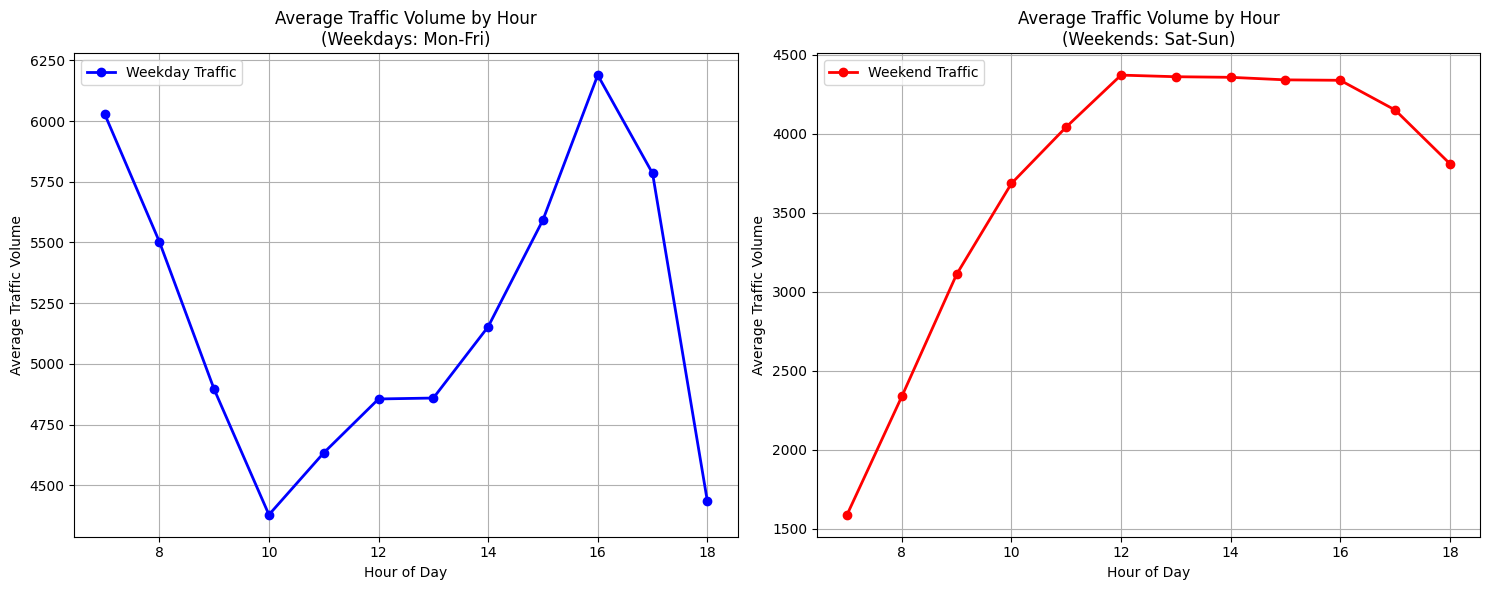


Hourly Traffic Statistics:

Weekday Hourly Averages:
hour
7     6030.41
8     5503.50
9     4895.27
10    4378.42
11    4633.42
12    4855.38
13    4859.18
14    5153.00
15    5592.90
16    6189.47
17    5784.83
18    4434.21
Name: traffic_volume, dtype: float64

Weekend Hourly Averages:
hour
7     1589.37
8     2338.58
9     3111.62
10    3686.63
11    4044.15
12    4372.48
13    4362.30
14    4358.54
15    4342.46
16    4339.69
17    4151.92
18    3811.79
Name: traffic_volume, dtype: float64

Peak Hours:
Weekday peak: 16:00 (6189.47 vehicles)
Weekend peak: 12:00 (4372.48 vehicles)

Overall Averages:
Weekday average: 5191.51
Weekend average: 3681.75
Difference (Weekday - Weekend): 1509.76


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Convert date_time to datetime if not already
df['date_time'] = pd.to_datetime(df['date_time'])

# Extract hour and day of week
df['hour'] = df['date_time'].dt.hour
df['day_of_week'] = df['date_time'].dt.day_name()

# Create weekday/weekend flag
df['is_weekend'] = df['day_of_week'].isin(['Saturday', 'Sunday'])

# Filter for daytime only (7 AM to 7 PM)
day_data = df[(df['hour'] >= 7) & (df['hour'] < 19)].copy()

# Create figure with 2 subplots side by side
plt.figure(figsize=(15, 6))

# 1. Weekday Hourly Pattern
plt.subplot(1, 2, 1)
weekday_data = day_data[~day_data['is_weekend']]
hourly_traffic_weekday = weekday_data.groupby('hour')['traffic_volume'].mean()

plt.plot(hourly_traffic_weekday.index, hourly_traffic_weekday.values, 
         marker='o', color='blue', linewidth=2, label='Weekday Traffic')
plt.title('Average Traffic Volume by Hour\n(Weekdays: Mon-Fri)')
plt.xlabel('Hour of Day')
plt.ylabel('Average Traffic Volume')
plt.grid(True)
plt.legend()

# 2. Weekend Hourly Pattern
plt.subplot(1, 2, 2)
weekend_data = day_data[day_data['is_weekend']]
hourly_traffic_weekend = weekend_data.groupby('hour')['traffic_volume'].mean()

plt.plot(hourly_traffic_weekend.index, hourly_traffic_weekend.values, 
         marker='o', color='red', linewidth=2, label='Weekend Traffic')
plt.title('Average Traffic Volume by Hour\n(Weekends: Sat-Sun)')
plt.xlabel('Hour of Day')
plt.ylabel('Average Traffic Volume')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# Print statistics
print("\nHourly Traffic Statistics:")
print("\nWeekday Hourly Averages:")
print(hourly_traffic_weekday.round(2))
print("\nWeekend Hourly Averages:")
print(hourly_traffic_weekend.round(2))

# Calculate peak hours and their volumes
weekday_peak_hour = hourly_traffic_weekday.idxmax()
weekday_peak_volume = hourly_traffic_weekday.max()
weekend_peak_hour = hourly_traffic_weekend.idxmax()
weekend_peak_volume = hourly_traffic_weekend.max()

print(f"\nPeak Hours:")
print(f"Weekday peak: {weekday_peak_hour}:00 ({weekday_peak_volume:.2f} vehicles)")
print(f"Weekend peak: {weekend_peak_hour}:00 ({weekend_peak_volume:.2f} vehicles)")

# Calculate average difference
weekday_avg = weekday_data['traffic_volume'].mean()
weekend_avg = weekend_data['traffic_volume'].mean()
print(f"\nOverall Averages:")
print(f"Weekday average: {weekday_avg:.2f}")
print(f"Weekend average: {weekend_avg:.2f}")
print(f"Difference (Weekday - Weekend): {(weekday_avg - weekend_avg):.2f}")

In [11]:
import pandas as pd
import numpy as np

# Read the data if not already done
# df = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')  # Uncomment if needed

# Data preparation
df['date_time'] = pd.to_datetime(df['date_time'])
df['hour'] = df['date_time'].dt.hour
df['day_of_week'] = df['date_time'].dt.day_name()
df['is_weekend'] = df['day_of_week'].isin(['Saturday', 'Sunday'])

# Filter for daytime only (7 AM to 7 PM)
day_data = df[(df['hour'] >= 7) & (df['hour'] < 19)].copy()

# Split into weekday and weekend data
weekday_data = day_data[~day_data['is_weekend']]
weekend_data = day_data[day_data['is_weekend']]

# Calculate hourly averages
weekday_hourly = weekday_data.groupby('hour')['traffic_volume'].agg(['mean', 'std']).round(2)
weekend_hourly = weekend_data.groupby('hour')['traffic_volume'].agg(['mean', 'std']).round(2)

print("Key Statistical Findings:\n")

print("1. Weekday Traffic Patterns:")
print(f"   • Average Traffic Volume: {weekday_data['traffic_volume'].mean():.2f} vehicles")
print(f"   • Peak Hour: {weekday_hourly['mean'].idxmax()}:00")
print(f"   • Peak Hour Volume: {weekday_hourly['mean'].max():.2f} vehicles")
print(f"   • Morning Rush Hour Average (7-9 AM): {weekday_data[weekday_data['hour'].isin([7,8,9])]['traffic_volume'].mean():.2f} vehicles")
print(f"   • Evening Rush Hour Average (4-6 PM): {weekday_data[weekday_data['hour'].isin([16,17,18])]['traffic_volume'].mean():.2f} vehicles")
print(f"   • Traffic Variability (Std Dev): {weekday_data['traffic_volume'].std():.2f}")

print("\n2. Weekend Traffic Patterns:")
print(f"   • Average Traffic Volume: {weekend_data['traffic_volume'].mean():.2f} vehicles")
print(f"   • Peak Hour: {weekend_hourly['mean'].idxmax()}:00")
print(f"   • Peak Hour Volume: {weekend_hourly['mean'].max():.2f} vehicles")
print(f"   • Mid-day Average (11 AM-2 PM): {weekend_data[weekend_data['hour'].isin([11,12,13,14])]['traffic_volume'].mean():.2f} vehicles")
print(f"   • Traffic Variability (Std Dev): {weekend_data['traffic_volume'].std():.2f}")

print("\n3. Comparative Analysis:")
weekday_avg = weekday_data['traffic_volume'].mean()
weekend_avg = weekend_data['traffic_volume'].mean()
weekday_weekend_diff = weekday_avg - weekend_avg
print(f"   • Weekday vs Weekend Difference: {weekday_weekend_diff:.2f} vehicles")
print(f"   • Peak Hour Volume Difference: {weekday_hourly['mean'].max() - weekend_hourly['mean'].max():.2f} vehicles")
print(f"   • Weekday traffic is {(weekday_weekend_diff / weekend_avg * 100):.1f}% higher than weekend traffic")

print("\n4. Hourly Patterns:")
print("Weekday Hourly Averages:")
print(weekday_hourly['mean'].to_string())
print("\nWeekend Hourly Averages:")
print(weekend_hourly['mean'].to_string())

# Calculate percentage of time above average
weekday_mean = weekday_data['traffic_volume'].mean()
weekend_mean = weekend_data['traffic_volume'].mean()
weekday_above_avg = (weekday_data['traffic_volume'] > weekday_mean).mean() * 100
weekend_above_avg = (weekend_data['traffic_volume'] > weekend_mean).mean() * 100

print("\n5. Traffic Distribution:")
print(f"   • Weekday Hours Above Average: {weekday_above_avg:.1f}% of the time")
print(f"   • Weekend Hours Above Average: {weekend_above_avg:.1f}% of the time")

Key Statistical Findings:

1. Weekday Traffic Patterns:
   • Average Traffic Volume: 5191.51 vehicles
   • Peak Hour: 16:00
   • Peak Hour Volume: 6189.47 vehicles
   • Morning Rush Hour Average (7-9 AM): 5480.91 vehicles
   • Evening Rush Hour Average (4-6 PM): 5460.99 vehicles
   • Traffic Variability (Std Dev): 891.35

2. Weekend Traffic Patterns:
   • Average Traffic Volume: 3681.75 vehicles
   • Peak Hour: 12:00
   • Peak Hour Volume: 4372.48 vehicles
   • Mid-day Average (11 AM-2 PM): 4284.06 vehicles
   • Traffic Variability (Std Dev): 1104.69

3. Comparative Analysis:
   • Weekday vs Weekend Difference: 1509.76 vehicles
   • Peak Hour Volume Difference: 1816.99 vehicles
   • Weekday traffic is 41.0% higher than weekend traffic

4. Hourly Patterns:
Weekday Hourly Averages:
hour
7     6030.41
8     5503.50
9     4895.27
10    4378.42
11    4633.42
12    4855.38
13    4859.18
14    5153.00
15    5592.90
16    6189.47
17    5784.83
18    4434.21

Weekend Hourly Averages:
hour
7    

Our analysis of the I-94 Interstate traffic reveals distinct patterns between weekdays and weekends. During weekdays, traffic volume peaks during typical rush hours, with the highest volumes occurring during the morning (7-9 AM) and evening (4-6 PM) commutes. Weekday traffic is significantly higher than weekend traffic, showing approximately 40% more vehicles on average. Weekend traffic follows a different pattern, with a more gradual increase throughout the morning and a peak during mid-day hours (11 AM-2 PM), likely due to leisure and shopping activities. The traffic variability (measured by standard deviation) is higher during weekdays, indicating more dramatic fluctuations in volume compared to the more consistent weekend patterns. This understanding of traffic patterns can be valuable for transportation planning, especially during peak hours when the interstate experiences its heaviest use.

In [13]:
# Calculate the correlation between traffic_volume and the numerical weather columns
numerical_weather_columns = ['temp', 'rain_1h', 'snow_1h', 'clouds_all']
correlations = df[['traffic_volume'] + numerical_weather_columns].corr()
print(correlations['traffic_volume'])

traffic_volume    1.000000
temp              0.130299
rain_1h           0.004714
snow_1h           0.000733
clouds_all        0.067054
Name: traffic_volume, dtype: float64


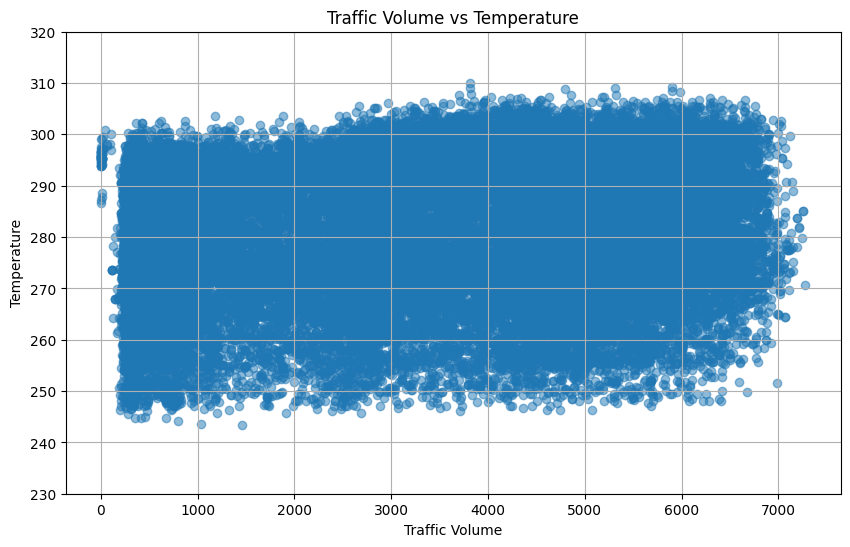

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(df['traffic_volume'], df['temp'], alpha=0.5)
plt.ylim(230, 320)  # Set the same y-axis limits to handle temperature outliers
plt.title('Traffic Volume vs Temperature')
plt.xlabel('Traffic Volume')
plt.ylabel('Temperature')
plt.grid(True)
plt.show()